# E-Commerce Supply Chain Analysis

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default="plotly_white"

In [3]:
df=pd.read_csv("supply_chain_data.csv")
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


## MAke the visualization of the price of the products and the revenue generated by them.

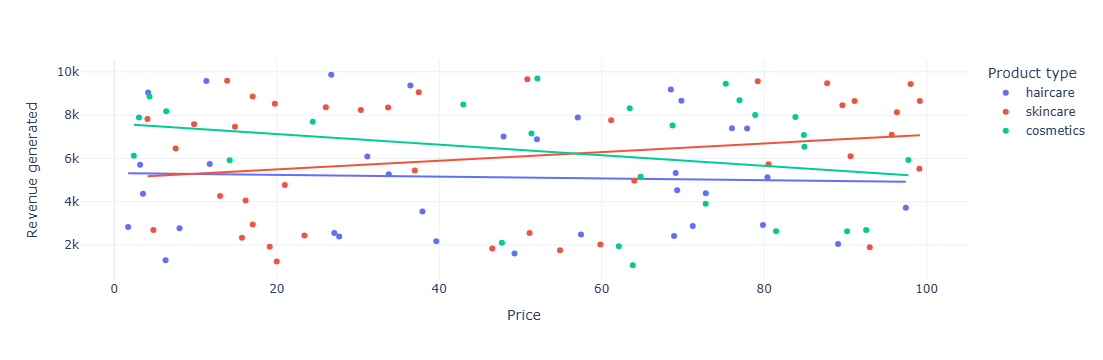

In [14]:
fig=px.scatter(df,y="Revenue generated",x="Price",color="Product type",hover_data=["Number of products sold"],trendline="ols")
fig.show()

## Analyze the Sales by Product type.

In [17]:
sales_by_product=df.groupby("Product type")["Number of products sold"].sum().reset_index()
sales_by_product


,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


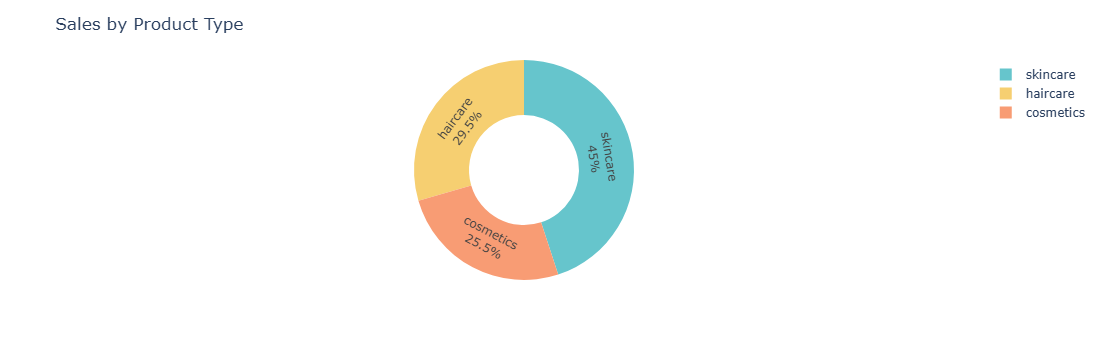

In [54]:
fig=px.pie(sales_by_product,
           values="Number of products sold",
           names="Product type",
           hole=0.5,
           color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text="Sales by Product Type")
fig.update_traces(textposition="inside",textinfo="label+percent")
fig.show()

## Find out the total revenue generated from Shipping carriers.

In [29]:
revenue_by_shipping=df.groupby("Shipping carriers")["Revenue generated"].sum().reset_index()
revenue_by_shipping

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


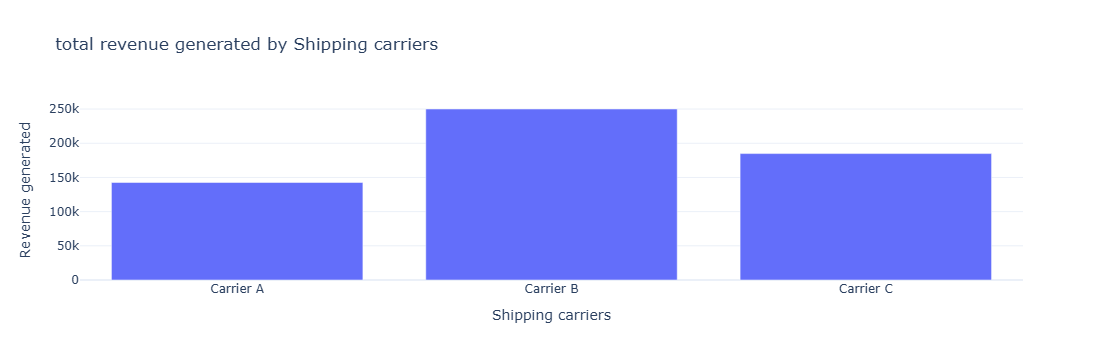

In [32]:
fig=px.bar(revenue_by_shipping,
           x="Shipping carriers",
           y="Revenue generated",
          title="total revenue generated by Shipping carriers")
fig.show()

## Analyze the Revenue generated by each SKU.

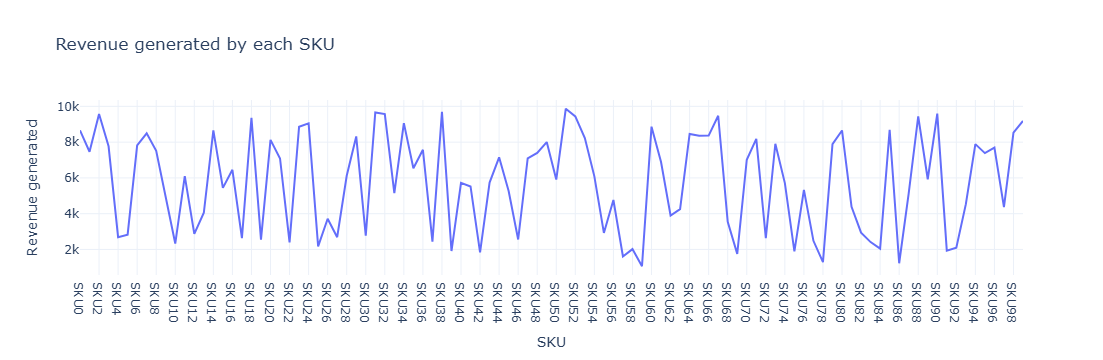

In [34]:
fig= px.line(df,
             x="SKU",
             y="Revenue generated",
             title="Revenue generated by each SKU")
fig.show()

## Analyze the Order quantity of each SKU

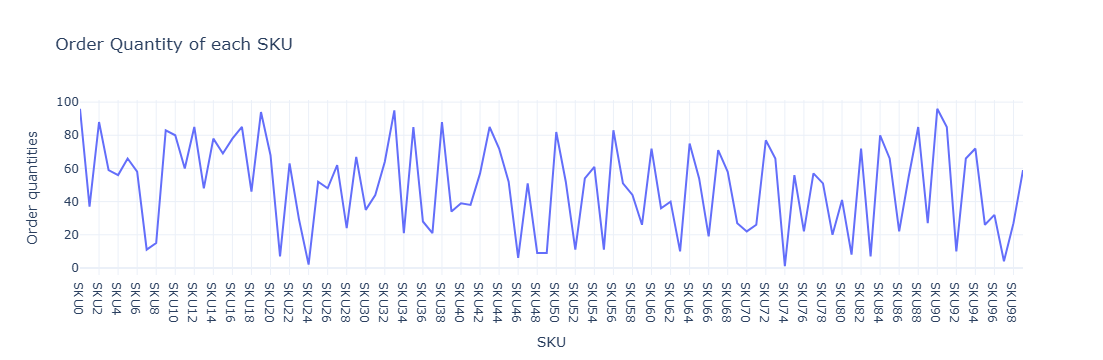

In [39]:
fig= px.line(df,
             x="SKU",
             y="Order quantities",
             title="Order Quantity of each SKU")
fig.show()

## Shipping cost of the Carriers

In [44]:
Shipping_cost= df.groupby("Shipping carriers")["Shipping costs"].sum().reset_index()
Shipping_cost

,Shipping carriers,Shipping costs
0,Carrier A,155.537831
1,Carrier B,236.897620
2,Carrier C,162.379457


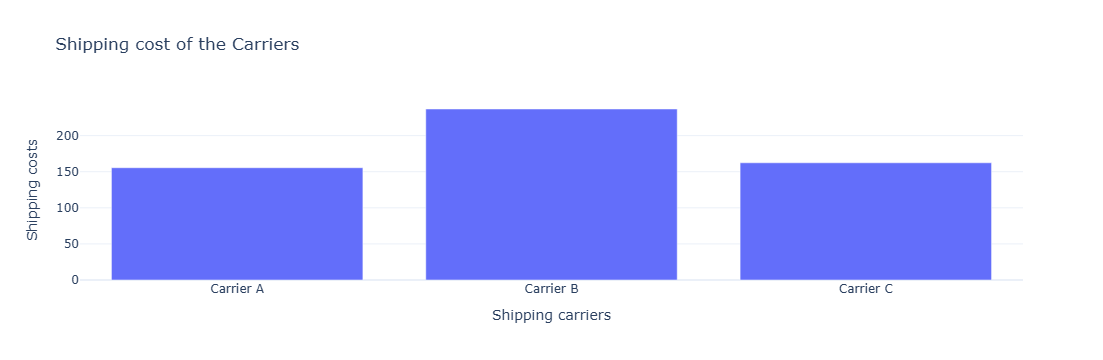

In [45]:
fig = px.bar(Shipping_cost,
             x="Shipping carriers",
             y="Shipping costs",
             title="Shipping cost of the Carriers")
fig.show()

## Find out the Cost Distribution of Tranportation mode.

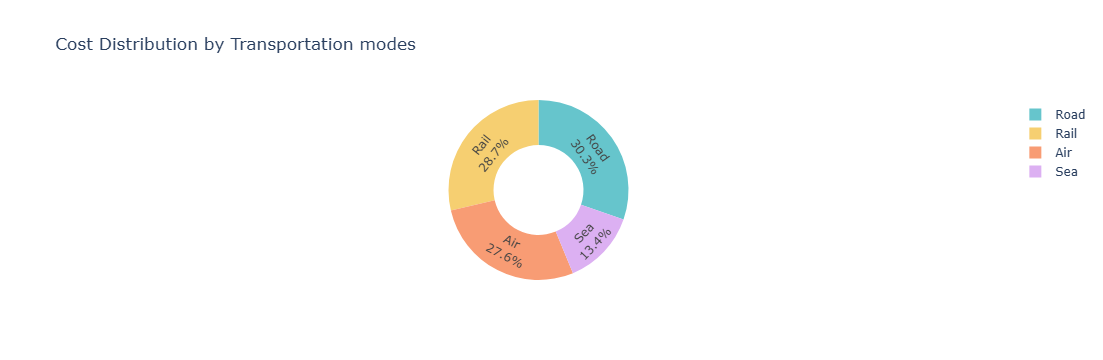

In [55]:
fig=px.pie(df,
           values="Costs",
           names="Transportation modes",
           hole=0.5,
           title="Cost Distribution by Transportation modes",
          color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition="inside",textinfo="label+percent")
fig.show()

## Analyzing the Defect Rate of the product while shipping

In [59]:
defect_product=df.groupby("Product type")["Defect rates"].mean().reset_index()
defect_product

,Product type,Defect rates
0,cosmetics,1.919287
1,haircare,2.483150
2,skincare,2.334681


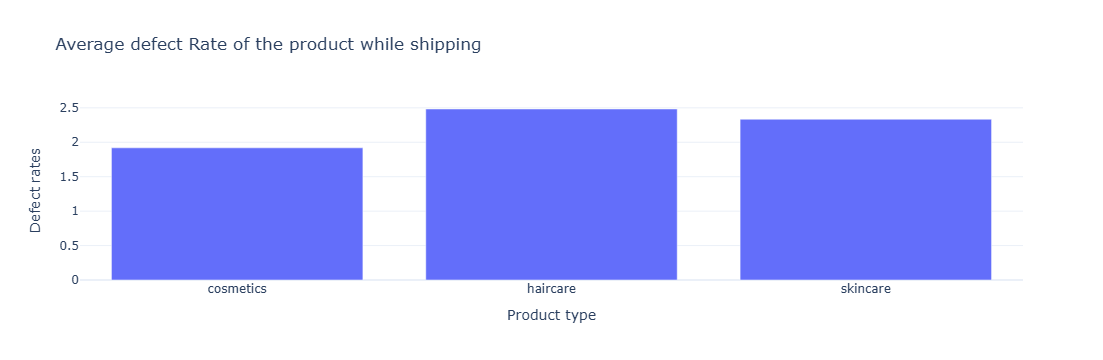

In [63]:
fig = px.bar(defect_product,
             x="Product type",
             y="Defect rates",
             title="Average defect Rate of the product while shipping")
fig.show()